In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import math
import os
import re
import sys
from enum import Enum
from io import StringIO
from time import time
import requests
import tensorflow
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler



In [ ]:
!pip install plotly
import plotly.express as px


In [ ]:
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00


In [ ]:
PRNG_SEED = 42

np.random.seed(PRNG_SEED)
tensorflow.random.set_seed(PRNG_SEED)

In [ ]:
if not os.path.exists('data'):
    os.makedirs('data')

In [ ]:
DATASET_COLUMNS_FILE = os.path.join("data", "/content/data/kddcup.data_10_percent.csv")
if not os.path.exists(DATASET_COLUMNS_FILE):
    with requests.get("/content/data/kddcup.names.csv") as request:
        with open(DATASET_COLUMNS_FILE, 'wb') as file:
            file.write(request.content)


In [ ]:
# Assuming the first 42 keys of column_types are the intended column names:
# Load or define the actual column names for your dataset
actual_column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
]

# Set the columns of the DataFrame
df.columns = actual_column_names + ["outcome"] # assuming "outcome" is the correct name for the last column

In [ ]:
df=pd.read_csv("/content/data/kddcup.data_10_percent.csv")
header=None
df.columns = actual_column_names + ["outcome"]

pd.set_option('display.max_rows', 10)
print(df)

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        239        486     0   
1              0           tcp    http   SF        235       1337     0   
2              0           tcp    http   SF        219       1337     0   
3              0           tcp    http   SF        217       2032     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0

In [ ]:
print(df.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        239        486     0   
1         0           tcp    http   SF        235       1337     0   
2         0           tcp    http   SF        219       1337     0   
3         0           tcp    http   SF        217       2032     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  19   
1               0       0    0  ...                  29   
2               0       0    0  ...                  39   
3               0       0    0  ...                  49   
4               0       0    0  ...                  59   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [ ]:
print(df.tail())

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
494015               0       0    0  ...                 255   
494016               0       0    0  ...                 255   
494017               0       0    0  ...                 255   
494018               0       0    0  ...                 255   
494019               0       0    0  ...                 255   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
494015                     1.0                     0.0   
494016                     1.0                  

In [ ]:
df.shape #number of rows and columns

(494020, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

In [ ]:
df.isnull().sum() #finding missing values

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
...,...
dst_host_serror_rate,0
dst_host_srv_serror_rate,0
dst_host_rerror_rate,0
dst_host_srv_rerror_rate,0


In [ ]:
df.duplicated().sum() #number of duplicatess

348435

In [ ]:
unique_df = df.drop_duplicates()

print(f"Dropped {len(df) - len(unique_df):,}/{len(df):,} (-{100*(len(df) - len(unique_df))/len(df):.2f}%) duplicate records")

Dropped 348,435/494,020 (-70.53%) duplicate records


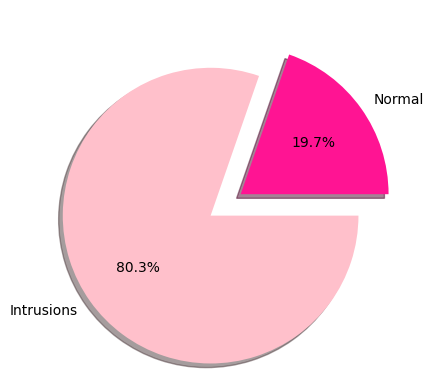

In [ ]:
# normal connections VS intrusion detections
type_frequencies = df['outcome'].value_counts()
normal_frequency = type_frequencies['normal.']
intrusion_frequency = sum([count for outcome_type, count in type_frequencies.items() if outcome_type != 'normal.'])
figure = plt.figure()
plt.pie(
    [normal_frequency, intrusion_frequency],
    labels=["Normal", "Intrusions"],
    explode=[0, .25],
    colors=["deeppink","pink"],
    autopct='%1.1f%%',
    shadow=True,
)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

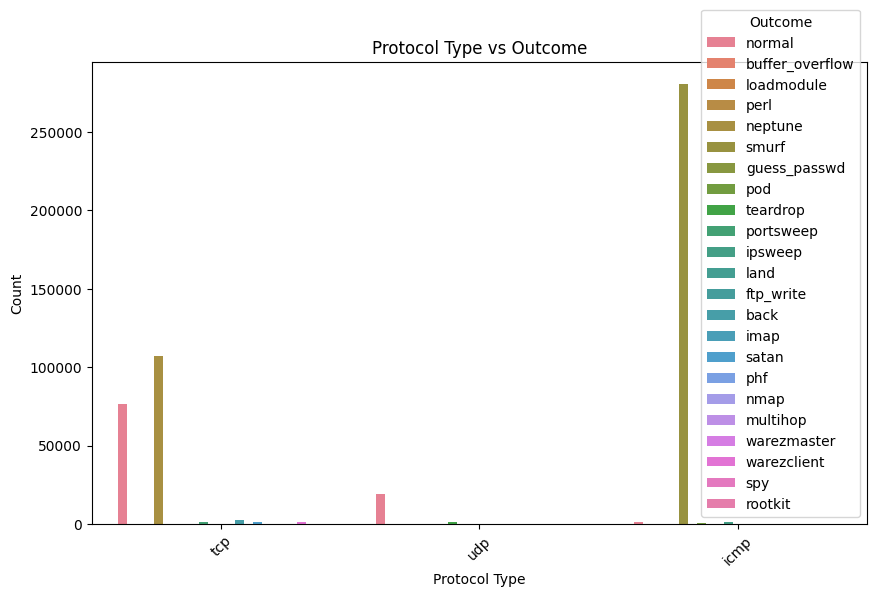

In [ ]:
df_categorical_cols = df.select_dtypes(include='object').columns
# Clean outcome column
df["outcome"] = df["outcome"].str.rstrip('.')
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol_type", hue="outcome", data=df)
plt.title("Protocol Type vs Outcome")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.legend(title="Outcome")
plt.xticks(rotation=45)
plt.show()

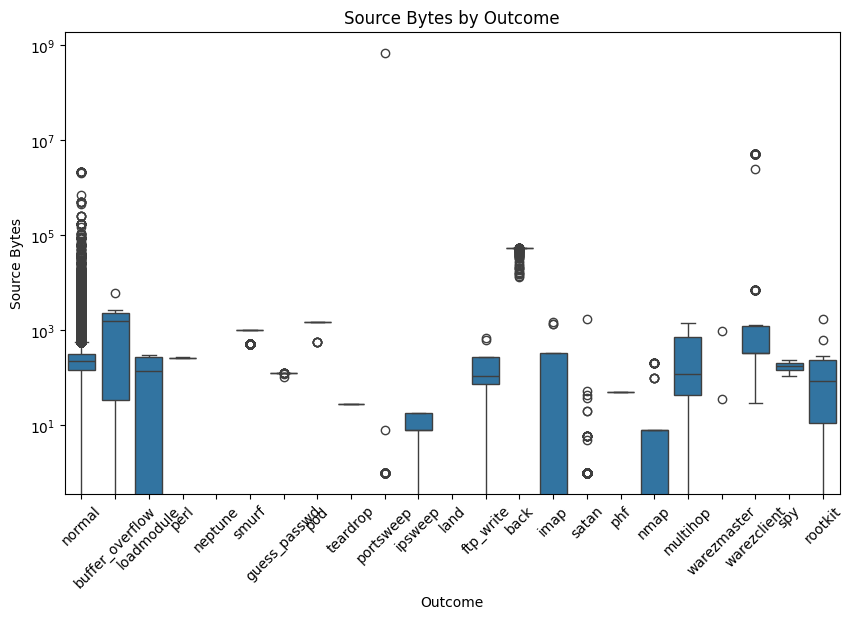

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="outcome", y="src_bytes", data=df)
plt.title("Source Bytes by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Source Bytes")
plt.yscale("log")  # Log scale to manage outliers
plt.xticks(rotation=45)
plt.show()

<ipython-input-121-7550991b562b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_indices = sorted(range(len(values)), key=lambda i: values[i], reverse=True)


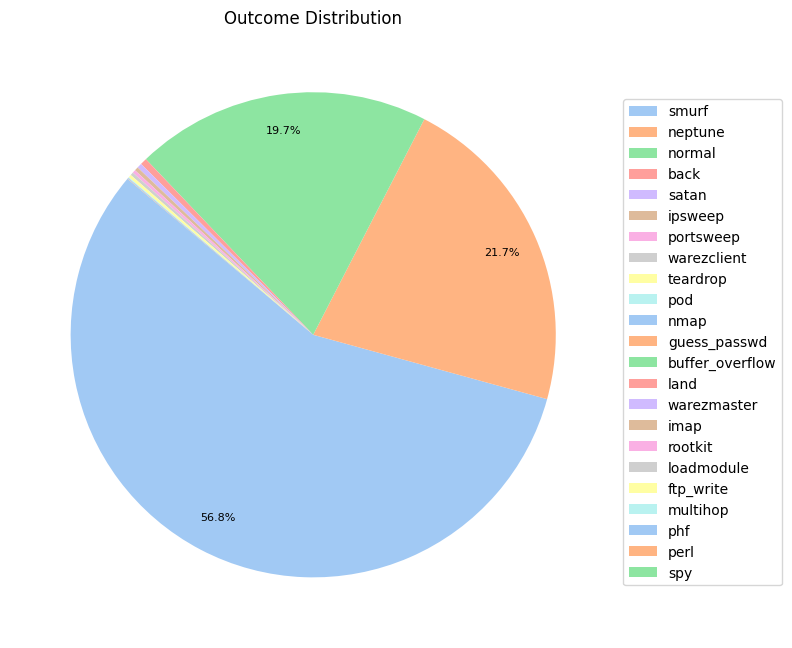

In [ ]:
outcome_counts = df["outcome"].value_counts()
def show_top_3(pct, values):
    sorted_indices = sorted(range(len(values)), key=lambda i: values[i], reverse=True)
    top_3_indices = set(sorted_indices[:3])  # Indices of the top 3 slices
    current_index = show_top_3.counter
    show_top_3.counter += 1
    if current_index in top_3_indices:
        return f'{pct:.1f}%'
    return ''

show_top_3.counter = 0  # Initialize a counter to track the slice index

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, autopct=lambda pct: show_top_3(pct, outcome_counts), startangle=140, colors=sns.color_palette("pastel"),pctdistance=0.85,labeldistance=1.1,textprops={'fontsize': 8})
plt.legend(outcome_counts.index, loc="upper left", bbox_to_anchor=(1, 0.9))
plt.tight_layout()
plt.title("Outcome Distribution")
plt.show()

In [ ]:
# frequency of each type of detected intrusion
intrusion_frequencies=type_frequencies.drop(labels=["normal"])

pd.set_option('display.max_rows', None)
display(
    pd.DataFrame(
        intrusion_frequencies.values,
        columns=['frequency'],
        index=[intrusion_name[:-1] for intrusion_name in intrusion_frequencies.index]
    ).sort_values(by="frequency", ascending=False)
)
pd.set_option('display.max_rows', 10)

,frequency
smur,280790
neptun,107201
bac,2203
sata,1589
ipswee,1247
portswee,1040
warezclien,1020
teardro,979
po,264
nma,231


In [ ]:
# garbage values
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*10)

tcp
icmp    283602
tcp     190064
udp      20354
Name: count, dtype: int64
******************************
http
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64
******************************
SF
SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64
******************************
normal.
smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.           

In [ ]:
df.describe() #descriptive statistics

,0,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,...,9,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include="object")

,tcp,http,SF,normal.
count,494020,494020,494020,494020
unique,3,66,11,23
top,icmp,ecr_i,SF,smurf.
freq,283602,281400,378439,280790


In [ ]:
encoded_df = pd.get_dummies(
    unique_df,
    # all categorical columns
    columns=[column_name for column_name, column_type in column_types.items() if column_type == ColumnType.SYMBOLIC],
    # drop original column
    drop_first=True,
)

pd.set_option('display.max_rows', 10)
print(encoded_df)

        duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
0              0        239        486               0       0    0   
1              0        235       1337               0       0    0   
2              0        219       1337               0       0    0   
3              0        217       2032               0       0    0   
4              0        217       2032               0       0    0   
...          ...        ...        ...             ...     ...  ...   
494015         0        310       1881               0       0    0   
494016         0        282       2286               0       0    0   
494017         0        203       1200               0       0    0   
494018         0        291       1200               0       0    0   
494019         0        219       1234               0       0    0   

        num_failed_logins  num_compromised  root_shell  su_attempted  ...  \
0                       0                0           0             0  

In [ ]:
# training, testing, validation
TRAINING_PROPORTION = .75
TESTING_PROPORTION = .10
VALIDATION_PROPORTION = .15

assert TRAINING_PROPORTION + TESTING_PROPORTION + VALIDATION_PROPORTION <= 1.0

partitions = {'train': []}

remaining_dataframe = []
grouped_outcomes = encoded_df.groupby('outcome')
maximum_per_class = math.ceil((TRAINING_PROPORTION * len(grouped_outcomes.groups['normal'])) / (len(grouped_outcomes.groups.keys()) - 1))
for key in grouped_outcomes.groups.keys():
    group = grouped_outcomes.get_group(key)

    train_size = min(math.ceil(TRAINING_PROPORTION * len(group.index)), maximum_per_class) if key != "normal." else TRAINING_PROPORTION

    #If train_size is an integer, ensure it's less than group size
    if isinstance(train_size, int):
        train_size = min(train_size, len(group) - 1) if len(group) > 1 else 1  # Handle cases where group size is 1 or less

    training, remaining = train_test_split(
        group,
        shuffle=True,
        train_size=train_size,
    )
    if key != "normal.":
        training = training.sample(n=maximum_per_class, replace=True, random_state=PRNG_SEED)
    partitions['train'].append(training)
    remaining_dataframe.append(remaining)

partitions['train'] = pd.concat(partitions['train'])
partitions['test'], partitions['validate'] = train_test_split(
    pd.concat(remaining_dataframe),
    shuffle=True,
    train_size=TESTING_PROPORTION / (1 - TRAINING_PROPORTION),
    test_size=VALIDATION_PROPORTION / (1 - TRAINING_PROPORTION),
)

In [ ]:
# normalize continuous columns
pd.set_option("mode.chained_assignment", None)

for column_name, column_type in column_types.items():
    if column_type == ColumnType.CONTINUOUS:
        mean = partitions['train'][column_name].mean()
        std = partitions['train'][column_name].std()
        if std == 0:
            std = 1

        for partition_name, dataframe in partitions.items():
            dataframe.loc[:,column_name] = (dataframe[column_name] - mean) / std

<ipython-input-56-e778ce90bc5f>:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.11235469 -0.11235469 -0.11235469 ... -0.108877   -0.108877
 -0.10849059]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-56-e778ce90bc5f>:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.11235469 -0.11235469 -0.11235469 ... -0.11235469 -0.11235469
 -0.11235469]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-56-e778ce90bc5f>:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.11235469 -0.11196828 -0.11235469 ... -0.11235469 -0.11235469
 -0.11235469]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-56-e778ce90bc5f>:1

In [ ]:
tf_input = {
    partition_name: dataframe.drop("outcome", axis="columns").reset_index(drop=True)
    for partition_name, dataframe in partitions.items()
}

In [ ]:
tf_output = {
    partition_name: pd.DataFrame(
        # one-hot-encode normal vs intrusions for binary classification
        [
            [1, 0] if outcome == 'normal.' else [0, 1]
            for outcome in dataframe[['outcome']].to_numpy()
        ],
        # binary classification of connection
        columns=['normal', 'intrusion'],
    )
    for partition_name, dataframe in partitions.items()
}

In [ ]:
# build model
model = Sequential(
    [
        Dense(128, input_dim=tf_input['train'].shape[1]),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(tf_output['train'].shape[1], activation='softmax')
    ],
    name="kddcup1999_classification"
)
# set optimizer settings
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "kddcup1999_classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          14,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,618 (100.07 KB)

 Trainable params: 25,618 (100.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training the model
start_time = time()

# store standard out stream
original_stdout = sys.stdout
# replace standard out for intercepting model training logs
sys.stdout = captured_stdout = StringIO()

try:
    # make temporary directory for saved model
    if not os.path.exists("temp"):
        os.mkdir("temp")

    # perform model training
    model.fit(
        # training data
        tf_input['train'], tf_output['train'],
        # use test data to validate losses, but not for training
        validation_data=(tf_input['validate'], tf_output['validate']),
        callbacks=[
            # patience: number of epochs with no improvement after which training will be stopped
            EarlyStopping(monitor='val_loss', min_delta=.001, patience=100, mode='auto', verbose=0),
            # save best model from all epochs
            ModelCheckpoint(filepath="temp/model_best_weights.keras", save_best_only=True, verbose=0)
        ],
        epochs=1000,
        verbose=2,
    )
finally:
    # restore standard out
    sys.stdout = original_stdout

# metrics
print(f"Model trained in {time() - start_time:.6f} seconds")
# noinspection PyTypeChecker
display(HTML(f'\
    <details>\
        <summary><b>➤ Training Details</b></summary>\
        {"<br>".join(captured_stdout.getvalue().splitlines())}\
    </details>\
'))

KeyboardInterrupt: 

In [ ]:
# Model analysis
# binary classification predictions
# load best model for prediction
model.load_weights("temp/model_best_weights.keras")
# compute predicted ratings for test dataset
predicted = np.argmax(model.predict(tf_input['test']), axis=1)

print(f"Predicted {len(predicted):,} classifications in {time() - start_time:.6f} seconds")

904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predicted 28,904 classifications in 1324.832471 seconds


,normal,intrusion
normal,8836,16
intrusion,12,20040


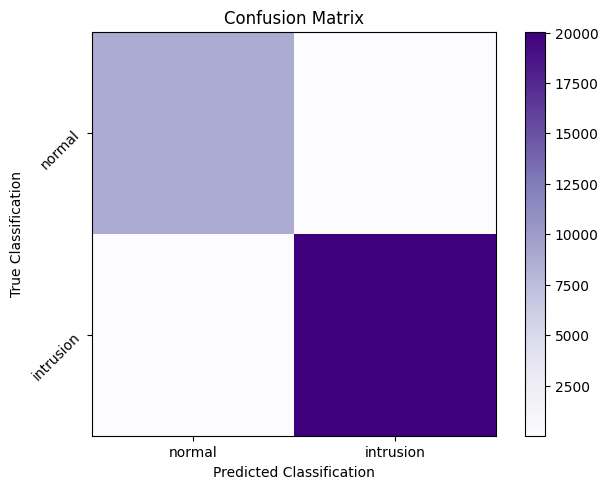

In [ ]:
# model accuracy (confusion matrix)
true_output = np.argmax(tf_output['test'].to_numpy(), axis=1)
cm = confusion_matrix(true_output, predicted)

# display confusion matrix values
display(pd.DataFrame(cm, columns=tf_output['test'].columns, index=tf_output['test'].columns))
# display a confusion matrix visualization
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(tf_output['test'].columns))
plt.xticks(tick_marks, tf_output['test'].columns)
plt.yticks(tick_marks, tf_output['test'].columns, rotation=45)
plt.tight_layout()
plt.ylabel("True Classification")
plt.xlabel("Predicted Classification")
plt.show()

In [ ]:
# performance metrics
print(classification_report(true_output, predicted, digits=4, target_names=tf_output['test'].columns))

              precision    recall  f1-score   support

      normal     0.9986    0.9982    0.9984      8852
   intrusion     0.9992    0.9994    0.9993     20052

    accuracy                         0.9990     28904
   macro avg     0.9989    0.9988    0.9989     28904
weighted avg     0.9990    0.9990    0.9990     28904



**Isolation** **Forest**
- identifies anomalies by isolating data points through random splits.

In [ ]:
encoded_df

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,is_guest_login_1
0,0,239,486,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
1,0,235,1337,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
2,0,219,1337,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
3,0,217,2032,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
4,0,217,2032,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
494016,0,282,2286,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
494017,0,203,1200,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
494018,0,291,1200,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
['protocol_type', 'service', 'flag']

['protocol_type', 'service', 'flag']

In [ ]:
!pip install neuraxle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of werkzeug to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of werkzeug to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Preprocessing data by splitting into X and Y

In [ ]:
from neuraxle.base import BaseStep
from sklearn.preprocessing import StandardScaler


class DFPreprocessor(BaseStep):
    def __init__(self):
        self.rescaler = StandardScaler()

    def _preprocess(self, df):
        Y = df.values[:, -1]
        X = df.values[:, 0:-1]
        Y = Y.reshape(-1, 1)
        return X, Y

    def fit(self, df, _=None):
        X, Y = self._preprocess(df)
        X = self.rescaler.fit(X)
        return X, Y

    def transform(self, df, _=None):
        X, Y = self._preprocess(df)
        X = self.rescaler.transform(X)
        return X, Y

In [ ]:
preproc = DFPreprocessor()

encoded_df_normal = encoded_df.copy()[encoded_df.outcome == "normal."]
encoded_df_without_normal = encoded_df.copy()[encoded_df.outcome != "normal."]

numerical_cols = encoded_df.select_dtypes(include=np.number).columns.tolist()
df_normal_numerical = encoded_df_normal[numerical_cols]
df_without_normal_numerical = encoded_df_without_normal[numerical_cols]
df_one_hot = encoded_df[numerical_cols]
encoded_df_normal.shape, encoded_df_without_normal.shape

# Fit isolation forest to the normal data
preproc.fit(df_normal_numerical)

X, y = preproc.transform(df_one_hot)
X_train, y_train = preproc.transform(df_normal_numerical)
X_anomalies, y_anomalies = preproc.transform(df_without_normal_numerical)

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(max_samples=100)

X_subset = X_train[np.random.randint(X_train.shape[0], size=100), :]
isf.fit(X_subset)

y_pred_train = isf.predict(X_train)

Checking values for anomalies

In [ ]:
y_pred_anomalies = isf.predict(X_anomalies) # check values for traffic

In [ ]:
y_pred = isf.predict(X)

In [ ]:
from collections import Counter
print("1 is for traffic captured as normal, -1 is for an anomaly detected:")
("Train:", Counter(y_pred_train), "Test with actual anomalies:", Counter(y_pred_anomalies))

1 is for traffic captured as normal, -1 is for an anomaly detected:


('Train:',
 Counter({1: 78018, -1: 9813}),
 'Test with actual anomalies:',
 Counter({-1: 55013, 1: 2741}))

Plotting the detected anomalies

In [ ]:
isf_df = df.copy()
isf_df = isf_df[isf_df.index.isin(encoded_df.index)] # Filter isf_df to match encoded_df indices
# Apply the IsolationForest model to the entire preprocessed dataset
y_pred = isf.predict(X)
isf_df['isf_pred'] = y_pred
size = isf_df.copy().groupby(["isf_pred", "outcome"]).size()
tot = size.loc[1].add(size.loc[-1], fill_value=0)
ss = pd.concat([size.loc[1], size.loc[-1]], axis=1).fillna(0)
ss_norm = pd.concat([size.loc[1].fillna(0) / tot * 100, size.loc[-1].fillna(0) / tot * 100], axis=1).fillna(0)
ss = ss.rename(columns={0: "No Anomaly Detected", 1: "Anomaly Detected"})
ss_norm = ss_norm.rename(columns={0: "No Anomaly Detected", 1: "Anomaly Detected"}).round(decimals=0)
ss

,No Anomaly Detected,Anomaly Detected
outcome,,
back,745.0,223
buffer_overflow,21.0,9
ftp_write,4.0,4
guess_passwd,1.0,52
ipsweep,304.0,347
...,...,...
imap,0.0,12
land,0.0,19
neptune,0.0,51820


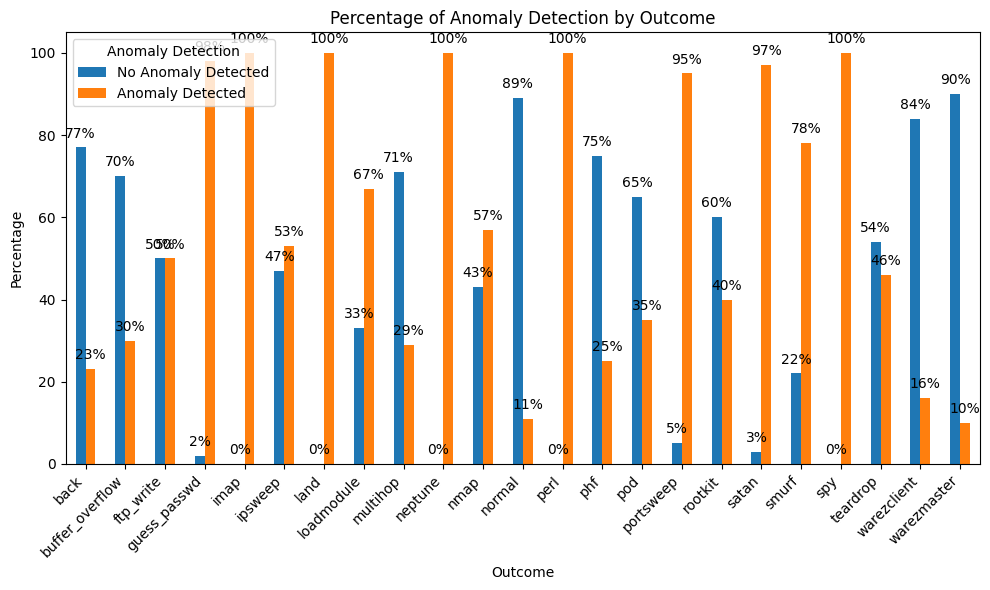

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

ax = ss_norm.plot(kind='bar', figsize=(10, 6))

plt.title('Percentage of Anomaly Detection by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Anomaly Detection')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
!pip install jupyter_dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
# prompt: UNIQUE VALUES IN PROTOCOL_TYPE COLUMN

print(df['protocol_type'].unique())

['tcp' 'udp' 'icmp']
